# word2vec 시각화

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

## 1) word2vec

In [2]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]


In [3]:
model = Word2Vec(sentences, size=2, window=3, min_count=1)            

In [6]:
# 어휘집
print(model.wv.vocab.keys())

# 단어 벡터
print(model.wv['this'])

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])
[0.18105532 0.12618944]


In [10]:
# 전체 어휘에 대한 word vector 추출
for v in model.wv.vocab.keys() :
    print(v, model.wv[v])
    
x = np.array([ model.wv[v] for v in model.wv.vocab.keys() ])
print(x.shape)        # 단어수 by dimension

this [0.18105532 0.12618944]
is [-0.06114742 -0.0934566 ]
a [ 0.06687903 -0.03454969]
good [-0.00126564 -0.1283258 ]
product [ 0.14907177 -0.16087192]
it [ 0.13208087 -0.02536829]
excellent [0.04551277 0.20032467]
bad [-0.00862995  0.16674718]
that [ 0.22300237 -0.16419944]
the [-0.04618385  0.2055843 ]
worst [-0.04217511 -0.22665025]
(11, 2)


## 2) 그래프를 통한 시각화

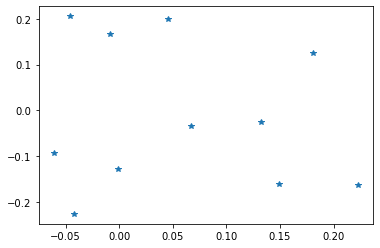

In [12]:
plt.plot( x[:, 0], x[:, 1], '*')

In [14]:
label = list(model.wv.vocab.keys())
print(label[0])

this


In [17]:
label[0], x[0, :]

('this', array([0.18105532, 0.12618944], dtype=float32))

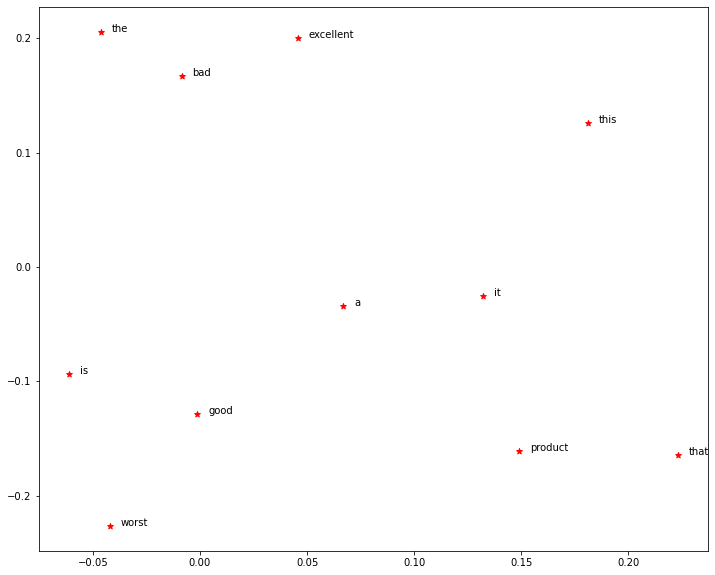

In [28]:
plt.figure(figsize = (12, 10))
for i in range(11) :
    plt.scatter( x[i, 0], x[i, 1], marker = '*', color = 'red')
    plt.text(x[i, 0] + 0.005, x[i, 1], label[i], fontsize = 10)
    
plt.show()

In [30]:
# 2개의 데이터를 pair group으로 만들기

a = [1,2,3]
b = ['a', 'b', 'c']

for c in zip(a, b) :
  print(c[0], c[1])

for i, j in zip(a, b) :   # i = c[0],   j=c[1]
  print(i, j)  

for i, _ in zip(a, b) :   # i = c[0],   j=c[1]
  print(i)    

1 a
2 b
3 c
1 a
2 b
3 c
1
2
3


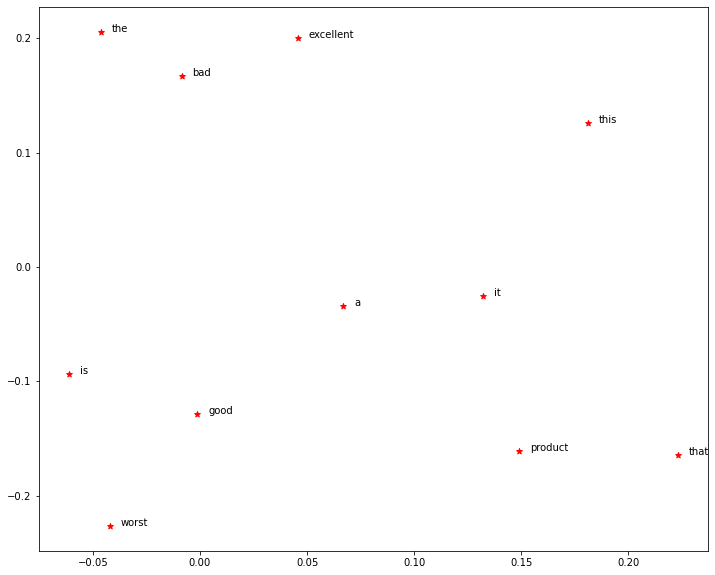

In [31]:
plt.figure(figsize = (12, 10))
for p, l in zip(x, label) :
    plt.scatter( p[0], p[1], marker = '*', color = 'red')
    plt.text(p[0] + 0.005, p[1], l, fontsize = 10)
    
plt.show()

# TSNE를 이용한 word2vec 시각화

In [32]:
from sklearn.manifold import TSNE

In [33]:
model20 = Word2Vec(sentences, size = 20, window = 3, min_count = 1)

x = np.array([ model20.wv[v] for v in model20.wv.vocab.keys() ])

label = list(model20.wv.vocab.keys())

tsne = TSNE(n_components = 2)
x_sne = tsne.fit_transform(x)

In [34]:
print(x_sne.shape)

(11, 2)


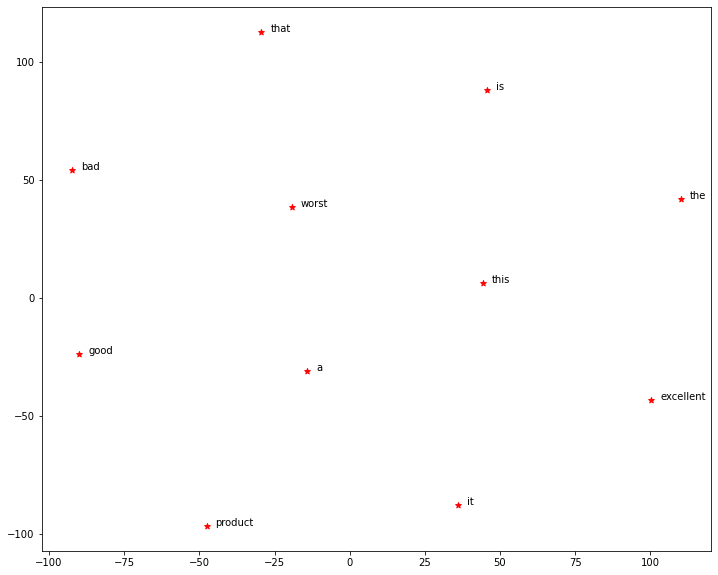

In [40]:
plt.figure(figsize = (12, 10))
for p, l in zip(x_sne, label) :
    plt.scatter( p[0], p[1], marker = '*', color = 'red')
    plt.text(p[0] + 3, p[1], l, fontsize = 10)
    
plt.show()

(11, 2)


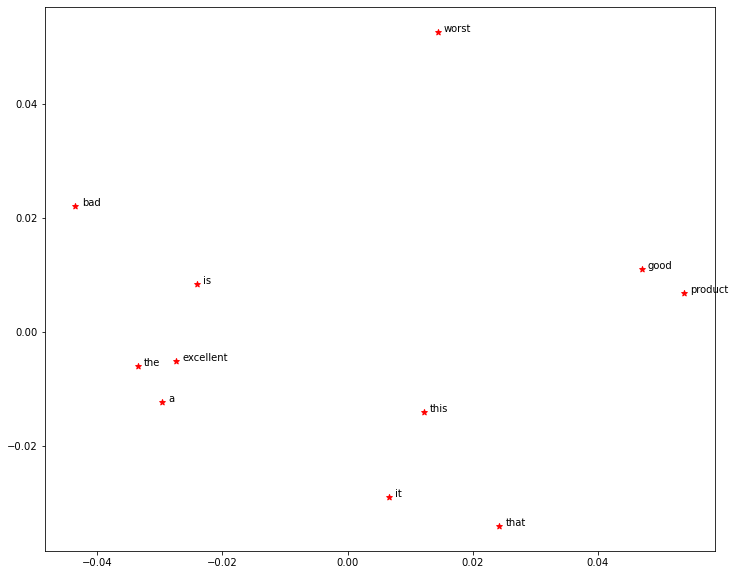

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

plt.figure(figsize = (12, 10))
for p, l in zip(x_pca, label) :
    plt.scatter( p[0], p[1], marker = '*', color = 'red')
    plt.text(p[0]+0.001, p[1], l, fontsize = 10)
    
plt.show()

# Naver 영화 긍정/부정 평가

In [102]:
def read_data(filename):
    with open(filename, 'r', encoding='utf8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] #header 제외
    return data

train_data = read_data('data/ratings_train_red.txt')
print(len(train_data)) 

38268


In [51]:
train_data[10]

['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1']

In [103]:
from konlpy.tag import Okt
pos_tagger = Okt()

def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc,norm=True,stem=True)]

tokenize('오늘 서울 날씨')

['오늘/Noun', '서울/Noun', '날씨/Noun']

In [104]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]

KeyboardInterrupt: 

In [105]:
len(train_docs)

150000

In [55]:
with open('train_docs.bin', 'rb') as f: train_docs = pickle.load(f) 

In [56]:
train_tokens = [doc[0] for doc in train_docs]

In [57]:
train_tokens[1]

['흠/Noun',
 '.../Punctuation',
 '포스터/Noun',
 '보고/Noun',
 '초딩/Noun',
 '영화/Noun',
 '줄/Noun',
 '..../Punctuation',
 '오버/Noun',
 '연기/Noun',
 '조차/Josa',
 '가볍다/Adjective',
 '않다/Verb']

In [100]:
len(train_tokens)

150000

# 명사, 동사, 형용사 추출

In [89]:
def getKeyword(pos) :
    return [ token.split('/')[0] for token in pos if token.split('/')[1] in ['Noun', 'Verb', 'Adjective']]

getKeyword(train_tokens[1])

['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다']

In [96]:
train_x = [getKeyword(doc) for doc in train_tokens]

In [99]:
len(train_x)

150000

In [64]:
# 변화 - 띄어쓰기 안하고 맞춤법도 안맞는거 ㅠ
print(train_data[2][1])
print(train_tokens[2])
print(train_x[2])

너무재밓었다그래서보는것을추천한다
['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb']
['무재', '밓었', '다그', '래서', '보다', '추천']


In [65]:
# 변화 - 이건 좀 괜찮은거
print(train_data[1000][1])
print(train_tokens[1000])
print(train_x[1000])

정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그자체네요
['정말/Noun', '최고/Noun', '의/Josa', '명작/Noun', '성인/Noun', '이/Josa', '되다/Verb', '보다/Verb', '이집트/Noun', '의/Josa', '왕자/Noun', '는/Josa', '또/Noun', '다른/Noun', '감동/Noun', '그/Determiner', '자체/Noun', '네/Suffix', '요/Josa']
['정말', '최고', '명작', '성인', '되다', '보다', '이집트', '왕자', '또', '다른', '감동', '자체']


## word2vec

In [137]:
%%time
model = Word2Vec(train_x, size=50, window=3, min_count=1) 
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()

Wall time: 10 s


In [67]:
model.save('naver.w2v')

## 유사어 검색

In [68]:
model.wv.most_similar('재미')

[('감흥', 0.801162600517273),
 ('형편', 0.7544126510620117),
 ('스릴', 0.7495364546775818),
 ('흥미', 0.740925669670105),
 ('어이', 0.7292357683181763),
 ('맛', 0.7193326354026794),
 ('잼', 0.7176814675331116),
 ('본적', 0.7149753570556641),
 ('볼일', 0.7082473039627075),
 ('삭히다', 0.7032033205032349)]

In [69]:
model.wv.most_similar(positive = ['정우성', '영화'])

[('샴', 0.854785144329071),
 ('뮤지컬', 0.8532028198242188),
 ('산영', 0.8503881096839905),
 ('장도', 0.8489714860916138),
 ('경우', 0.8466917872428894),
 ('공연', 0.8429184556007385),
 ('로맨틱코미디', 0.8397343158721924),
 ('장영', 0.8396525979042053),
 ('이은우', 0.8385998010635376),
 ('멜로영화', 0.8373594880104065)]

In [70]:
model.wv.most_similar('지루')

[('늘어지다', 0.897632360458374),
 ('시시하다', 0.8924006819725037),
 ('따분하다', 0.8695574402809143),
 ('지루함', 0.8693104982376099),
 ('산만하다', 0.8685515522956848),
 ('징그럽다', 0.8596351742744446),
 ('오글거리다', 0.8536103367805481),
 ('유치하다', 0.8535286784172058),
 ('황당하다', 0.8513524532318115),
 ('별루', 0.8510464429855347)]

In [73]:
# 영화 감정 평가
'떨어지다' in vocabs

True

In [74]:
model.wv.most_similar(['떨어지다'])

[('제로', 0.8473217487335205),
 ('약하다', 0.8244833946228027),
 ('떨어뜨리다', 0.7687003016471863),
 ('부족하다', 0.7650820016860962),
 ('부족', 0.7570246458053589),
 ('비다', 0.7532666325569153),
 ('밋밋하다', 0.752934455871582),
 ('성은', 0.7502968907356262),
 ('봉착', 0.742424488067627),
 ('베이스', 0.7379917502403259)]

## 감정평가

- word2vec에서는 단어를 벡터화
- 문제는 입력은 문장임
- 문장을 고정된 크기의 벡터로 변화히기 위해 평균벡터로 만듬

주인공이 연기력이 떨어져요

주인공 ->  1x50

연기력 ->  1x50

떨어지다 -> 1x50   




## 평균벡터 구하기

In [75]:
a = np.array([1, 4])
b = np.array([2, 7])
c = np.array([-2, 5])


d = (a + b +c) / 3
print(d)

[0.33333333 5.33333333]


In [86]:
# str = train_x[0]
str = ['더빙', '진짜', '짜증나다', '목소리', '키보드']
print(str)                # 4개의 단어
feature = []
for s in str :
    if s in model.wv.vocab :             # 학습데이터에 있는 단어만 사용
        # print(model.wv[s])          # 4개의 벡터가 나옴
        feature.append(model.wv[s])          # word vector 누적
if feature == [] :
    feature = np.zeros(50)
else :
    feature = np.mean(np.array(feature), axis = 0)    # 열기준 평균벡터 계산

print(feature)

['더빙', '진짜', '짜증나다', '목소리', '키보드']
[ 0.16832457  0.5927069  -0.40361103  0.15030228  0.7299137   0.2099752
  0.7993599   0.12306832  0.8795389   1.3047116   0.8046298  -0.2701617
 -0.07468127  1.2665375  -2.51049    -0.7371305   0.22052951  0.32239926
  0.21568386  0.16466312 -0.41395083 -1.0206941   0.13223714  0.12393971
  0.25968876 -0.21349663 -0.0648065   1.4395024   0.2102834  -1.4003012
  0.42302638 -0.6812097   0.20996091 -0.13849589 -0.17722577 -0.37042227
 -0.9383946  -0.27533096  1.0608478   0.45960104  0.5246235   0.65971243
 -0.35510558 -1.2063818   1.2449791   0.01037461  0.673162   -0.16743176
  0.31221932  1.3241518 ]


In [136]:
def get_feature(tokens) :
    feature = np.array([model.wv[token] for token in tokens if token in model.wv.vocab ] )  
    if feature.size == 0 : 
        return np.zeros(50)
    return np.mean(feature, axis=0)

f = get_feature(['주인공', '연기력', '떨어지다', '비추'])
print(f)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'wv'

In [94]:
str = '주인공의 연기력이 떨어져서 비추합니다'
feature = get_feature(getKeyword(tokenize(str)))
feature

array([-0.68238103,  0.3659935 , -0.40073043,  0.4904376 ,  0.04822354,
       -0.11271437,  0.07165389, -0.14380042, -0.11246447,  0.76945865,
        0.8341688 , -0.18610653,  0.538324  ,  1.2083168 , -2.2796755 ,
       -1.4789591 ,  0.51869214, -0.39272898,  0.64697635, -0.10226457,
        0.61636955,  0.02835431,  0.38613042, -0.30732173,  0.17586654,
       -0.00395734,  0.18641177,  0.7622895 , -0.05404485, -0.25675842,
        0.09930154,  0.17675394, -0.24690095, -0.05480158,  0.72676647,
        0.04247457, -0.03341682,  0.59086895,  0.0906832 ,  0.19157799,
        0.33429927,  0.34664565, -0.2884156 , -0.96388704,  0.64483225,
       -0.3266612 ,  1.2702    ,  0.18136445, -0.76359   ,  0.89643687],
      dtype=float32)

## 감정평가 문장 벡터 생성

In [95]:
X = np.array([get_feature(tokens) for tokens in train_x])
y = np.array([float(c) for _, c in train_docs])
print(X.shape, y.shape)       # 문장갯수 x 특징벡터크기

(150000, 50) (150000,)


In [140]:
# 인식률
from sklearn.linear_model import LinearRegression, LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X, y)

LogisticRegression()

In [141]:
# 인식률
model_lr.score(X, y)

0.7919666666666667

In [143]:
# 다른 방법
y_pred = model_lr.predict(X)
np.mean(y_pred == y)

0.7919666666666667

In [144]:
# 인식률
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)

DecisionTreeClassifier()

In [145]:
model_dt.score(X, y)

0.9892

In [146]:
y_pred = model_dt.predict(X)
np.mean(y_pred == y)

0.9892

In [162]:
q = input()
feature = get_feature(getKeyword(tokenize(q)))
p = model_lr.predict_proba(feature.reshape(-1, 50))
print(p[0, 1] > 0.5)
p = model_dt.predict(feature.reshape(-1, 50))
print(p == 1)

 재미


False
[ True]


# 사용자 기반 추천 시스템

In [170]:
import pandas as pd
recom_df = pd.read_csv('data/toy.csv', header = None)
recom_df.columns = ['공조', '더킹', '라라랜드', '컨택트', '너의이름은']
recom_df.index = ['재석', '명수', '하하', '준하', '세형', '광희']
recom_df

,공조,더킹,라라랜드,컨택트,너의이름은
재석,5,4,4,3,0
명수,1,0,1,0,4
하하,4,4,0,5,3
준하,0,2,1,4,3
세형,4,0,4,4,2
광희,4,2,3,0,1


## 명수와 준하의 유사도

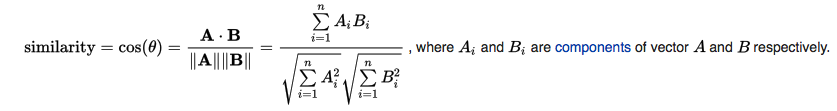

In [173]:
v1 = recom_df.iloc[1].values           # 명수
v2 = recom_df.iloc[3].values           # 준하

q1 = np.sum(v1 * v2)
q2 = np.sqrt(np.sum(v1 ** 2))
q3 = np.sqrt(np.sum(v2 ** 2))

sim = q1 / (q2 * q3)
sim

0.5594309277855158

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

distance = cosine_similarity(recom_df)
display(distance)

display(cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1)))

distance = pd.DataFrame(distance, columns = ['재석', '명수', '하하', '준하', '세형', '광희'], index = ['재석', '명수', '하하', '준하', '세형', '광희'])
distance

array([[1.        , 0.26111648, 0.77272727, 0.53935989, 0.81934649,
        0.89893315],
       [0.26111648, 1.        , 0.46420708, 0.55943093, 0.52297636,
        0.47336463],
       [0.77272727, 0.46420708, 1.        , 0.83151316, 0.71692818,
        0.60677988],
       [0.53935989, 0.55943093, 0.83151316, 1.        , 0.65828059,
        0.33333333],
       [0.81934649, 0.52297636, 0.71692818, 0.65828059, 1.        ,
        0.75955453],
       [0.89893315, 0.47336463, 0.60677988, 0.33333333, 0.75955453,
        1.        ]])

array([[0.55943093]])

,재석,명수,하하,준하,세형,광희
재석,1.000000,0.261116,0.772727,0.539360,0.819346,0.898933
명수,0.261116,1.000000,0.464207,0.559431,0.522976,0.473365
하하,0.772727,0.464207,1.000000,0.831513,0.716928,0.606780
준하,0.539360,0.559431,0.831513,1.000000,0.658281,0.333333
세형,0.819346,0.522976,0.716928,0.658281,1.000000,0.759555
광희,0.898933,0.473365,0.606780,0.333333,0.759555,1.000000


In [182]:
# 세형의 더킹 영화에 대한 평가 점수 예측
v1 = distance.loc['세형'].values
v2 = recom_df['더킹'].values

# print(v1, v2)

p = np.sum(v1 * v2) / np.sum(v1)
print(p)

2.005940609004159


## 세형의 모든 영화에 대한 평점

In [185]:
# (4, 0, 4, 4, 2)
np.matmul(distance.values[4].reshape(1, 6), recom_df.values / np.sum(distance.values[4])) 

array([[3.24444051, 2.00594061, 2.39828007, 2.83126174, 2.00511806]])

In [190]:
distance.values[4]

array([0.81934649, 0.52297636, 0.71692818, 0.65828059, 1.        ,
       0.75955453])

In [191]:
distance.values[4].reshape(1, 6)

array([[0.81934649, 0.52297636, 0.71692818, 0.65828059, 1.        ,
        0.75955453]])

In [227]:
recom_df.values / np.sum(distance.values[4])

array([[1.11679781, 0.89343825, 0.89343825, 0.67007869, 0.        ],
       [0.22335956, 0.        , 0.22335956, 0.        , 0.89343825],
       [0.89343825, 0.89343825, 0.        , 1.11679781, 0.67007869],
       [0.        , 0.44671912, 0.22335956, 0.89343825, 0.67007869],
       [0.89343825, 0.        , 0.89343825, 0.89343825, 0.44671912],
       [0.89343825, 0.44671912, 0.67007869, 0.        , 0.22335956]])

In [192]:
recom_df.values

array([[5, 4, 4, 3, 0],
       [1, 0, 1, 0, 4],
       [4, 4, 0, 5, 3],
       [0, 2, 1, 4, 3],
       [4, 0, 4, 4, 2],
       [4, 2, 3, 0, 1]], dtype=int64)

In [193]:
np.sum(distance.values[4])

4.4770861437831915

## 모든 사람의 모든 영화에 대한 평점

In [231]:
df = []
for i in range(len(recom_df.values)) :
    df.append( np.matmul(distance.values[i], recom_df.values / np.sum(distance.values[i])))

result = pd.DataFrame(df, index = ['재석', '명수', '하하', '준하', '세형', '광희'], columns = ['공조', '더킹', '라라랜드', '컨택트', '너의 이름은'])
display(result)

,공조,더킹,라라랜드,컨택트,너의 이름은
재석,3.547758,2.322622,2.510708,2.865783,1.751924
명수,2.483248,1.513789,1.863980,2.265711,2.618099
하하,3.101592,2.269386,2.066111,3.076382,2.138359
준하,2.689689,2.078105,1.874081,3.163954,2.392237
세형,3.244441,2.005941,2.398280,2.831262,2.005118
광희,3.544570,2.133986,2.564032,2.480927,1.776269


In [234]:
# 모든 사람에 대한 코사인 유사도
df = pd.read_csv('data/toy.csv', header = None)
distances = cosine_similarity(df)
result = np.matmul(distances, df.values) /  np.sum(distances, axis=1).reshape(-1, 1)
result = pd.DataFrame(result, index = ['재석', '명수', '하하', '준하', '세형', '광희'], columns = ['공조', '더킹', '라라랜드', '컨택트', '너의 이름은'])
display(result)

,공조,더킹,라라랜드,컨택트,너의 이름은
재석,3.547758,2.322622,2.510708,2.865783,1.751924
명수,2.483248,1.513789,1.863980,2.265711,2.618099
하하,3.101592,2.269386,2.066111,3.076382,2.138359
준하,2.689689,2.078105,1.874081,3.163954,2.392237
세형,3.244441,2.005941,2.398280,2.831262,2.005118
광희,3.544570,2.133986,2.564032,2.480927,1.776269


# 유저유사도 & 장르 모두 고려 추천 시스템


A영화(드라마0.15)   B영화(animation), 0.8    C영화(공포, 0.05) 
3.5      2.1      4.5


3.5/5   2.1/5     4.5/5

u = 유저유사도 0 ~ 1값
g = 장르       0 ~ 1값

p = (0.5)u + (0.5)g 







